In [1]:
pip install rgb-to-hex

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

 

In [2]:
data = pd.read_csv(r"C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Project/temperature_data.csv")
data

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


## Preprocessing

In [4]:
def preprocess_inputs(df):
    df = df.copy()
    df = df.drop('profile_id', axis =1)
    
    y = df['motor_speed'].copy()
    x = df.drop('motor_speed', axis =1).copy()
    
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
    
    return x , y

In [5]:
x , y = preprocess_inputs(data)

In [6]:
x

ambient   coolant       u_d       u_q    torque       i_d       i_q  \
0      -0.753416 -1.120454  0.323842 -1.289164 -0.247367  1.024560 -0.243174   
1      -0.772669 -1.119032  0.325575 -1.288994 -0.246316  1.024497 -0.243146   
2      -0.784378 -1.118693  0.328689 -1.293119 -0.246615  1.024435 -0.243132   
3      -0.782408 -1.118776  0.329619 -1.293150 -0.245818  1.027836 -0.244271   
4      -0.775467 -1.118787  0.331128 -1.294413 -0.245883  1.026797 -0.243925   
...          ...       ...       ...       ...       ...       ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541 -0.252836  1.024130 -0.243036   
998066 -0.045245  0.314537  0.327616 -1.242071 -0.252836  1.024135 -0.243049   
998067 -0.038711  0.301961  0.326859 -1.238277 -0.252836  1.024178 -0.243015   
998068 -0.035774  0.296640  0.326900 -1.240924 -0.252836  1.024134 -0.243041   
998069 -0.040173  0.307199  0.326743 -1.238017 -0.252836  1.024128 -0.243036   

              pm  stator_yoke  stator_tooth  stator_winding  
0      -2.528584    -1.830112     -2.064767       -2.017442  
1      -2.528932    -1.829659     -2.063483       -2.017040  
2      -2.529189    -1.829091     -2.062697       -2.016752  
3      -2.528150    -1.829024     -2.061760       -2.017041  
4      -2.528413    -1.829189     -2.061418       -2.017555  
...          ...          ...           ...             ...  
998065  0.436131     1.016892      0.838630        0.499487  
998066  0.436028     1.011746      0.836983        0.499041  
998067  0.435715     1.001246      0.836481        0.497425  
998068  0.435834     0.997502      0.833048        0.495337  
998069  0.435441     0.985520      0.830588        0.494136  

[998070 rows x 11 columns]

In [7]:
y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
998065   -1.222428
998066   -1.222437
998067   -1.222430
998068   -1.222432
998069   -1.222431
Name: motor_speed, Length: 998070, dtype: float64

## EDA

In [8]:
eda_df = pd.concat([x,y], axis =1).copy()

### Univariate Analysis

In [9]:
eda_df.describe()

ambient       coolant           u_d           u_q        torque  \
count  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05   
mean  -8.710848e-14  3.311537e-14 -5.435962e-15  2.790820e-16 -5.697083e-13   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.629364e+00 -1.430606e+00 -1.663685e+00 -1.851460e+00 -3.349634e+00   
25%   -5.996013e-01 -1.040127e+00 -8.329068e-01 -9.195578e-01 -2.641375e-01   
50%    2.719319e-01 -1.814697e-01  2.633206e-01 -9.390939e-02 -1.842995e-01   
75%    6.953605e-01  6.444250e-01  3.544629e-01  8.563201e-01  5.516585e-01   
max    2.991585e+00  2.637919e+00  2.274782e+00  1.795006e+00  3.026641e+00   

                i_d           i_q            pm   stator_yoke  stator_tooth  \
count  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05  9.980700e+05   
mean   2.613170e-15  9.983176e-16 -1.469712e-15 -1.524101e-14  1.158428e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -3.255192e+00 -3.345431e+00 -2.638981e+00 -1.833374e+00 -2.064767e+00   
25%   -7.631070e-01 -2.546066e-01 -6.708058e-01 -7.470911e-01 -7.600494e-01   
50%    2.081015e-01 -1.872727e-01  9.919089e-02 -5.777424e-02  7.295650e-03   
75%    1.008947e+00  5.035055e-01  6.880556e-01  6.960052e-01  7.747592e-01   
max    1.055957e+00  2.923484e+00  2.934512e+00  2.445984e+00  2.329815e+00   

       stator_winding    motor_speed  
count    9.980700e+05  998070.000000  
mean    -6.861447e-15      -0.006336  
std      1.000001e+00       1.001229  
min     -2.019386e+00      -1.371529  
25%     -7.228854e-01      -0.951892  
50%      1.048858e-02      -0.140246  
75%      7.308067e-01       0.853584  
max      2.662129e+00       2.024164

C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

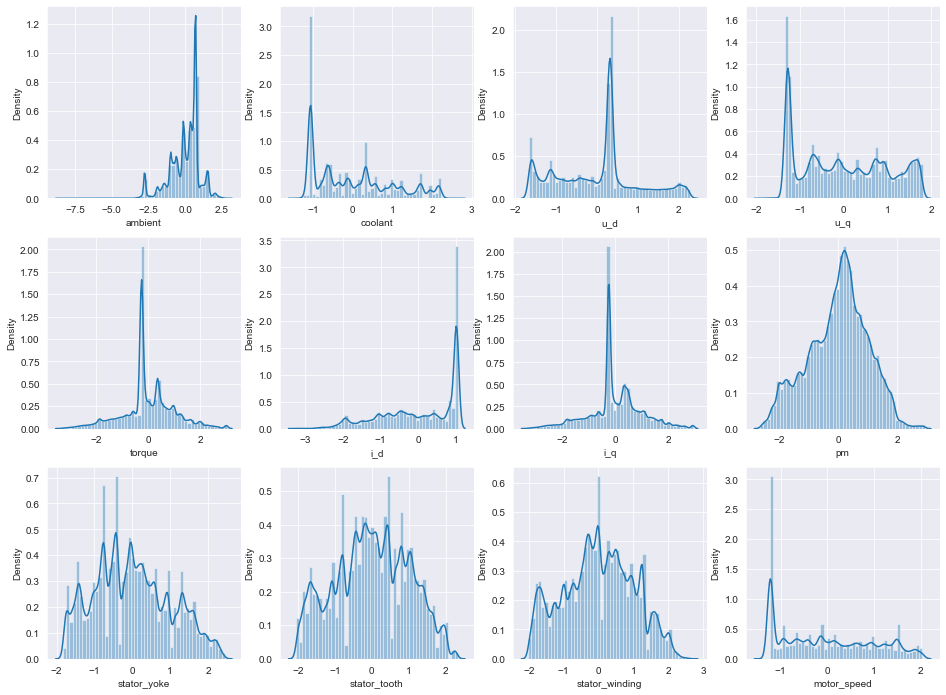

In [10]:
plt.figure(figsize=(16,12))
for i in range (len(eda_df.columns)):
    plt.subplot(3,4, i+1)
    sns.distplot(eda_df[eda_df.columns[i]])
plt.show()

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preet\anaconda3\lib\si

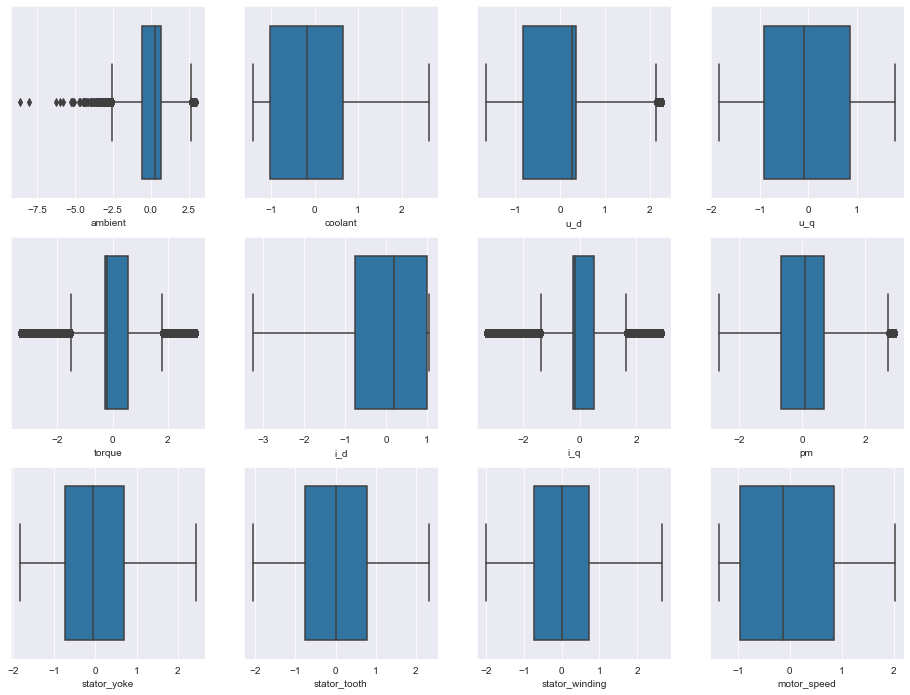

In [11]:
plt.figure(figsize=(16,12))
for i in range (len(eda_df.columns)):
    plt.subplot(3,4, i+1)
    sns.boxplot(eda_df[eda_df.columns[i]])
plt.show()

## Multivariate Analysis

<Figure size 1152x1152 with 0 Axes>

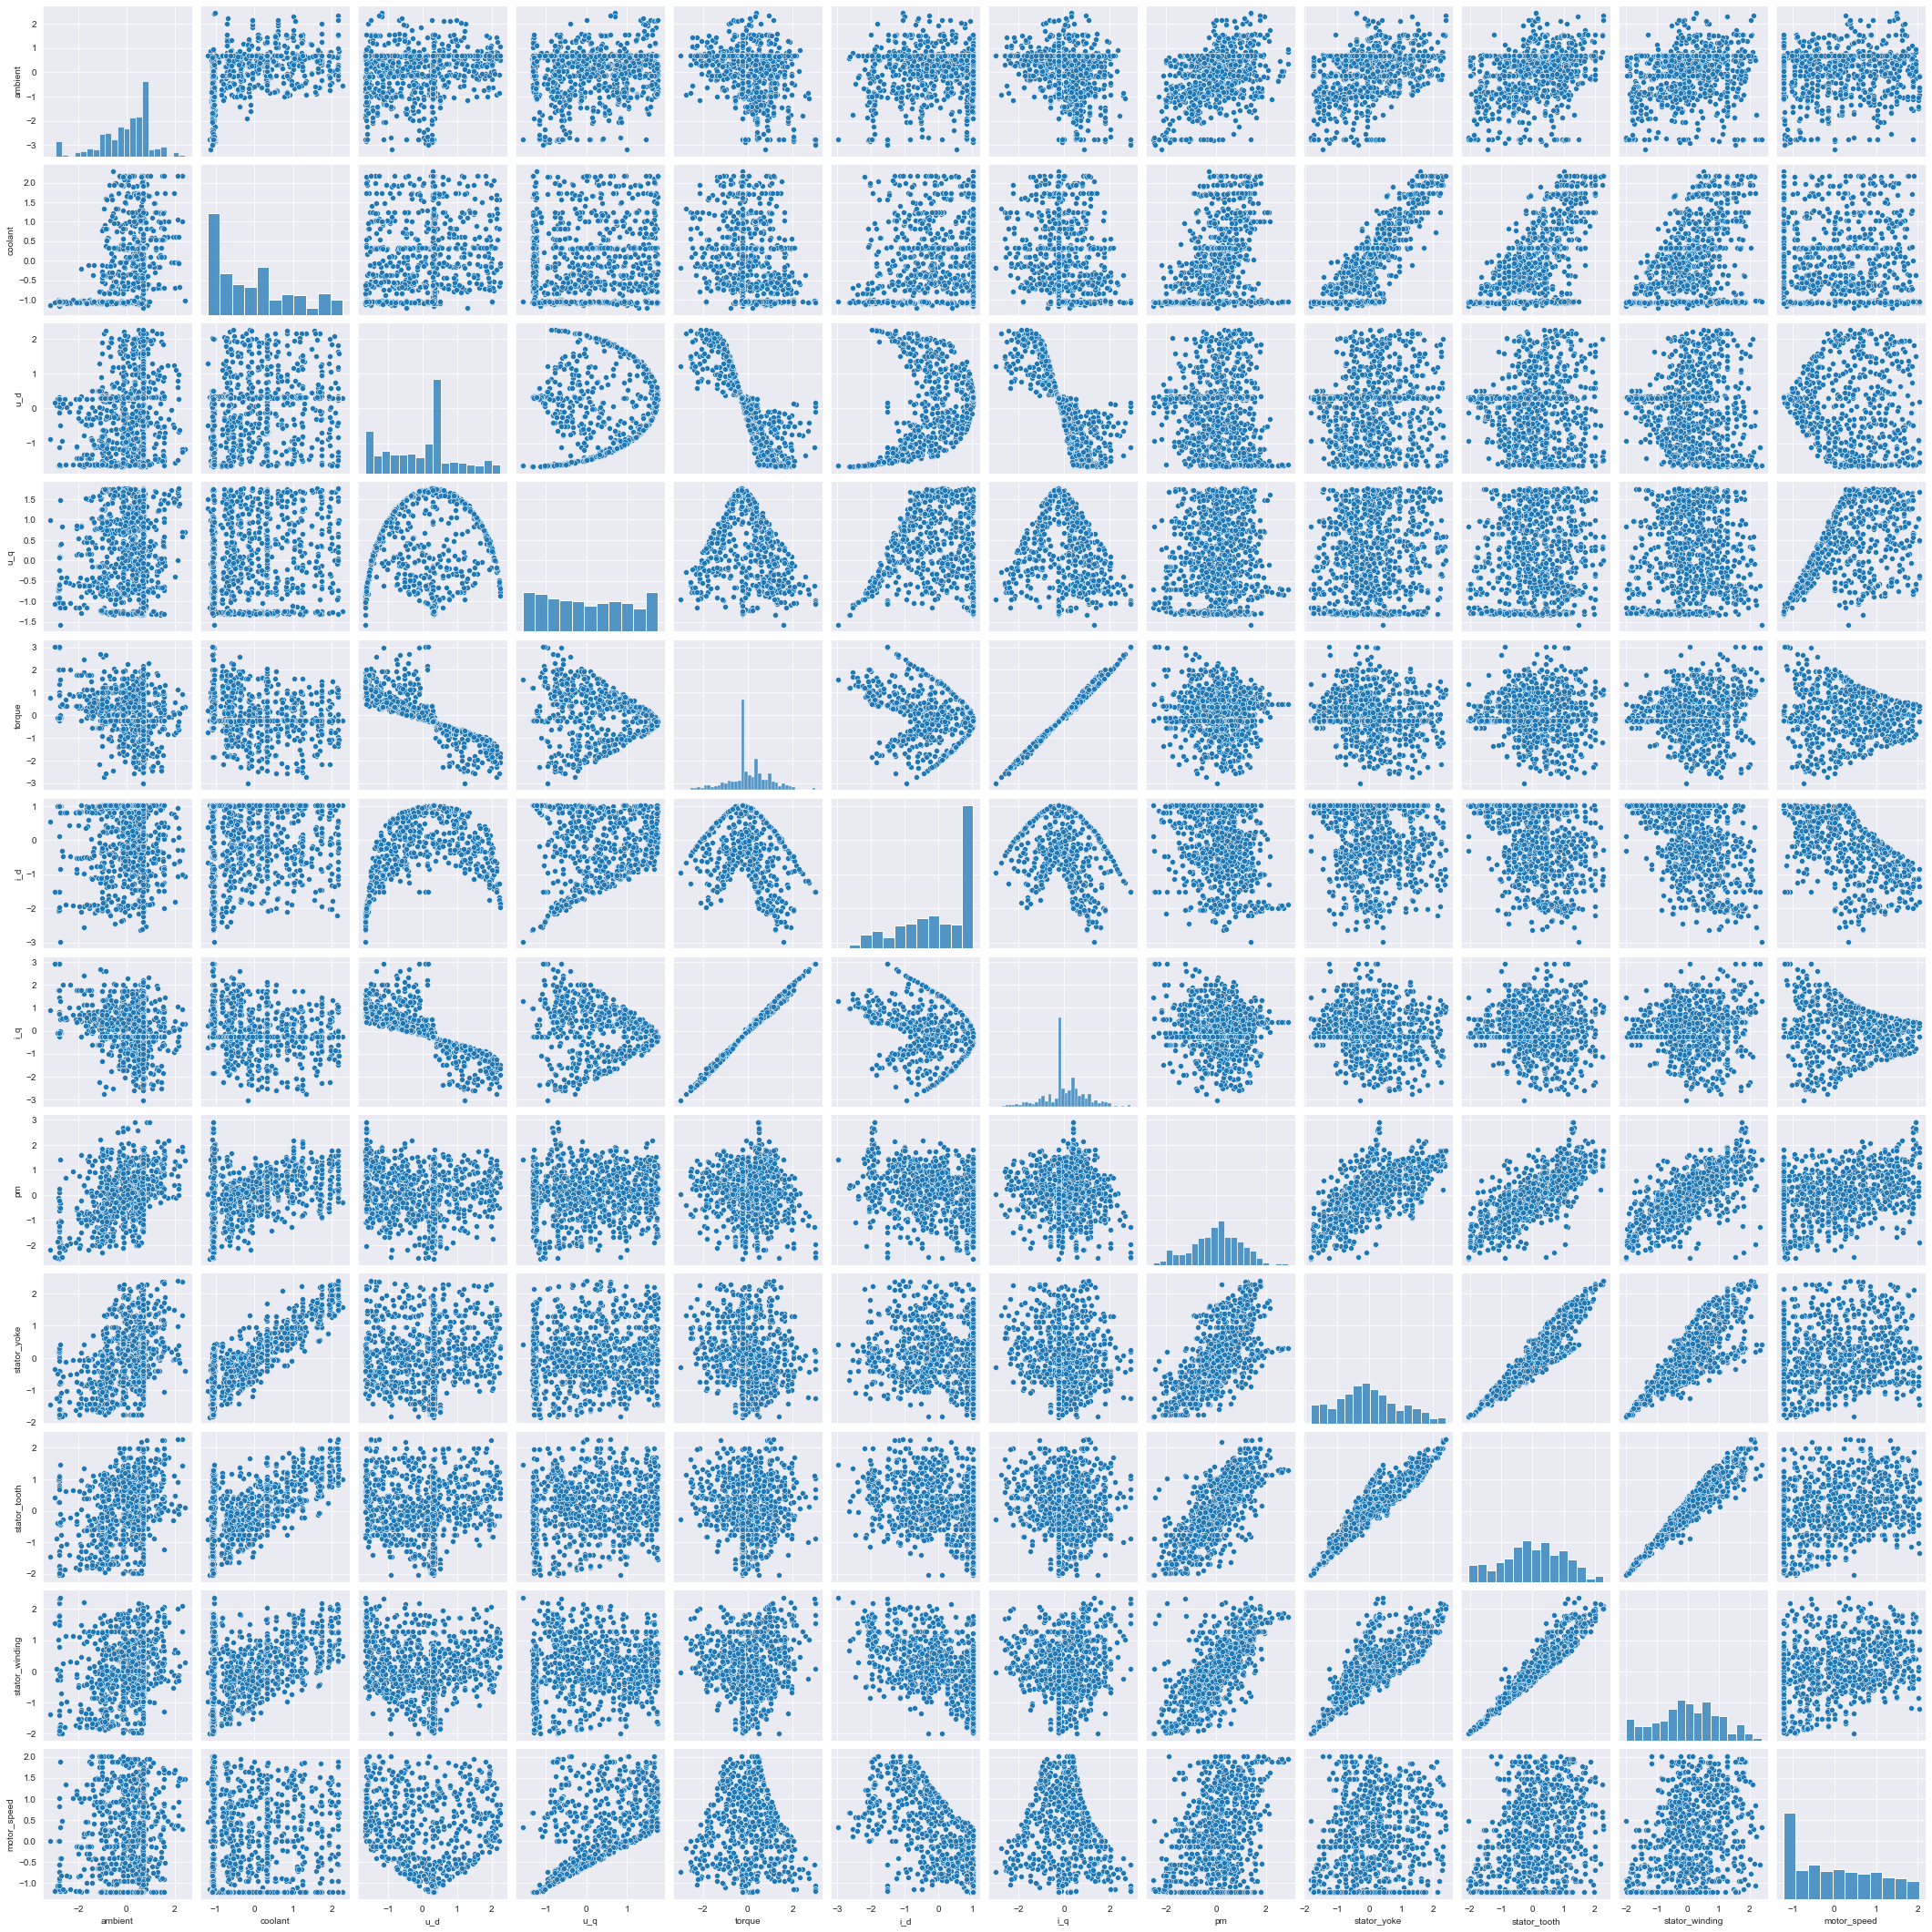

In [12]:
plt.figure(figsize=(16,16))
sns.pairplot(eda_df.sample(1000))
plt.show()

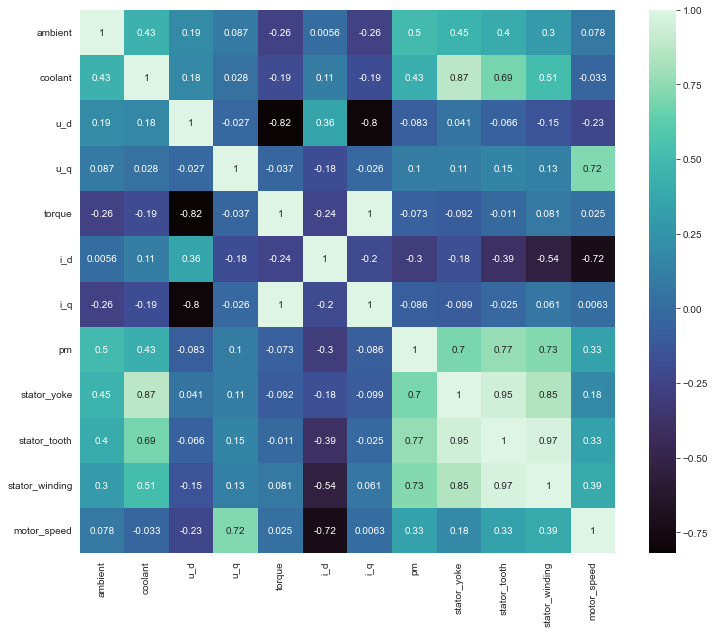

In [13]:
corr = eda_df.corr()

plt.figure(figsize =(12,10))
sns.heatmap(corr, annot=True, cmap = 'mako')
plt.show()

# Training

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size =0.7, random_state=123)

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
print('The r^2 score of the model is:{:.4f}'.format(model.score(X_test, Y_test)))

The r^2 score of the model is:0.9278


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
plt.style.use('bmh')

In [19]:
df= pd.read_csv(r"C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Project/temperature_data.csv")
target_features = ['pm', 'stator_tooth', 'stator_yoke', 'stator_winding']
df.shape

(998070, 13)

In [20]:
df.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

##Measurement session lengths.

The plots below show that all measurement sessions range from 20 minutes to around 6 hours. The two short session ids "46" and "47" might be not very representative as temperatures inside electric motors need time to vary.

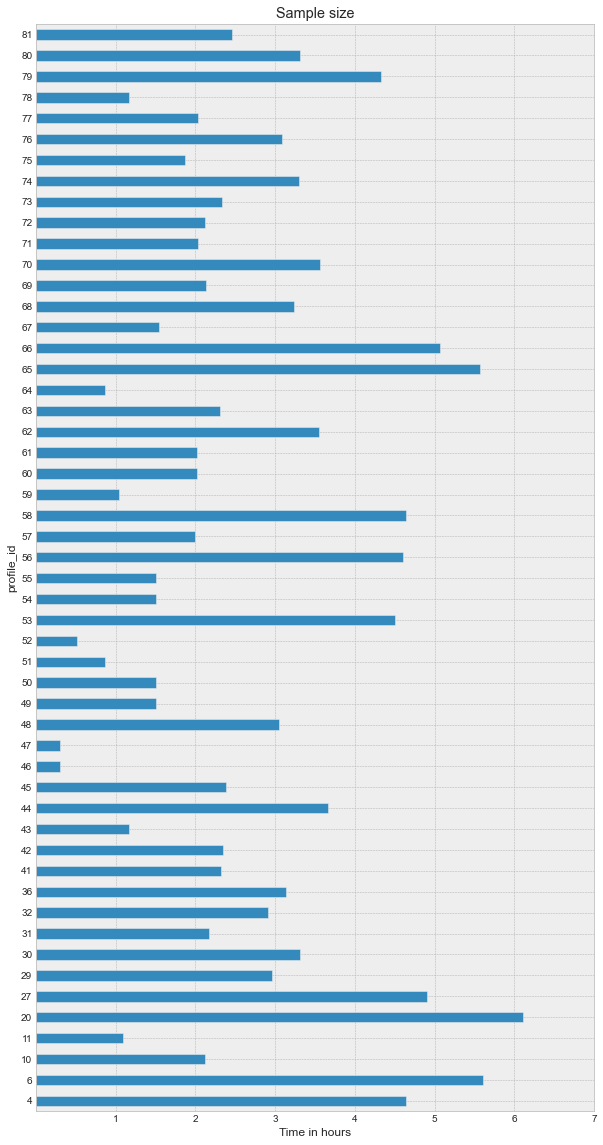

In [22]:
p_counts = df.groupby('profile_id')['motor_speed'].agg('count')
ax = p_counts.plot.barh(figsize=(10, 20), title='Sample size')
_ = ax.set_xticks(2*3600*np.arange(1, 8)) # 2Hz sample rate
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Time in hours')

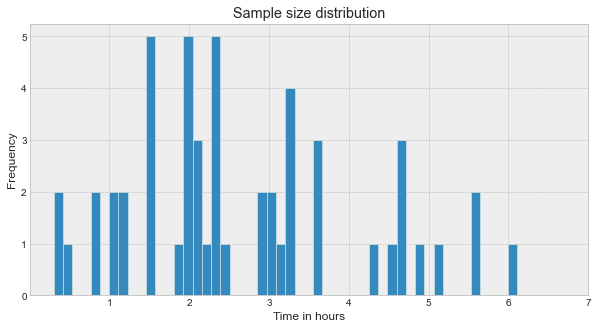

In [23]:
ax = p_counts.plot.hist(title='Sample size distribution', bins=50, figsize=(10, 5), grid=True)
_ = ax.set_xticks(2*3600*np.arange(1, 8)) # 2Hz sample rate
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Time in hours')

C:\Users\preet\AppData\Local\Temp/ipykernel_10232/4149593409.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


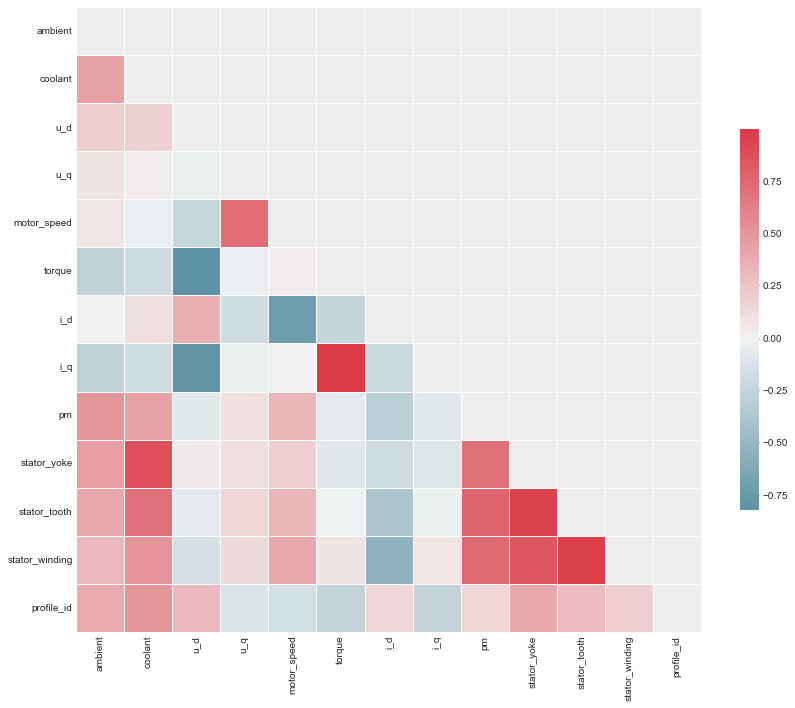

In [24]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(14,14))
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We observe a very high positve linear correlation between i_q and torque. Moreover, u_d is highly negative linearly correlated with torque and i_q. Indeed, for the former insight we can refer to electric drive theory, where either higher torque is exclusively dependent on i_q in case of similar sized inductances in d- and q-axis, or increasing with higher i_q and slightly decreasing i_d elsewise (more common in practice).

In [25]:
pip install rgb-to-hex

## Distribution

C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

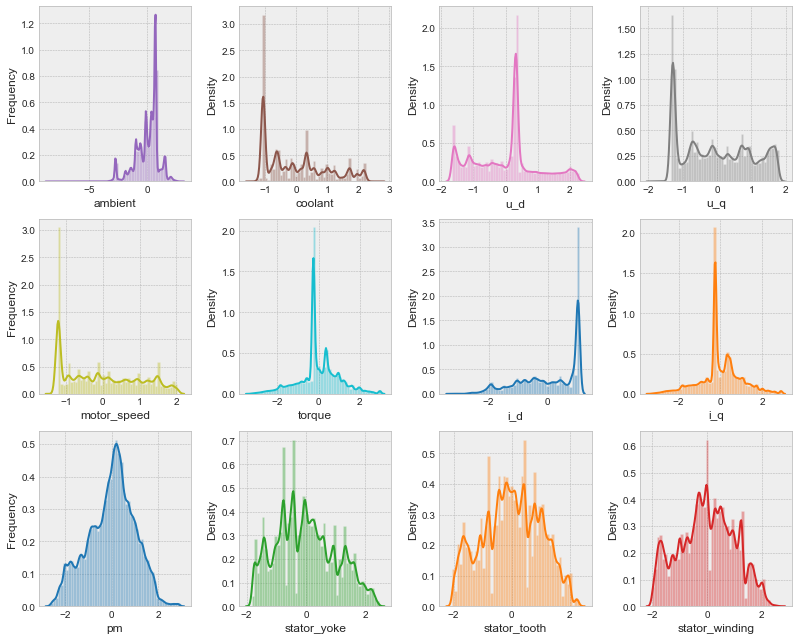

In [26]:
dfui = df.drop(['profile_id'], axis=1)  # dataframe under investigation

# prepare colors
color_list = plt.cm.tab10(np.linspace(0, 1, 10)[list(range(10))+[0, 1]])
coi = target_features + [c for c in dfui if c not in target_features]  # columns of interest
feat_clrs = {k:rgb2hex(color_list[i][:3]) for i, k in enumerate(coi)} if color_list is not None else {}

n_cols = 4
n_rows = np.ceil(dfui.shape[1] / n_cols).astype(int)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.8*n_cols, n_rows*3))
for i, (ax, col) in enumerate(zip(axes.flatten(), list(dfui.columns))):
    sns.distplot(dfui[col], color=feat_clrs[col], ax=ax)
    if i % n_cols == 0:
        ax.set_ylabel('Frequency')
plt.tight_layout()

We find

distributions are not very gaussian,

we often have multi-modal distributions,

some features show a significant spike in their distribution. This is reasonable as these are the values that are held during no excitation (resting/cooldown phase)

target temperatures are less spikey, indicating a slower progress or response to input features (read 'greater time constants').

## Time Series gestalt

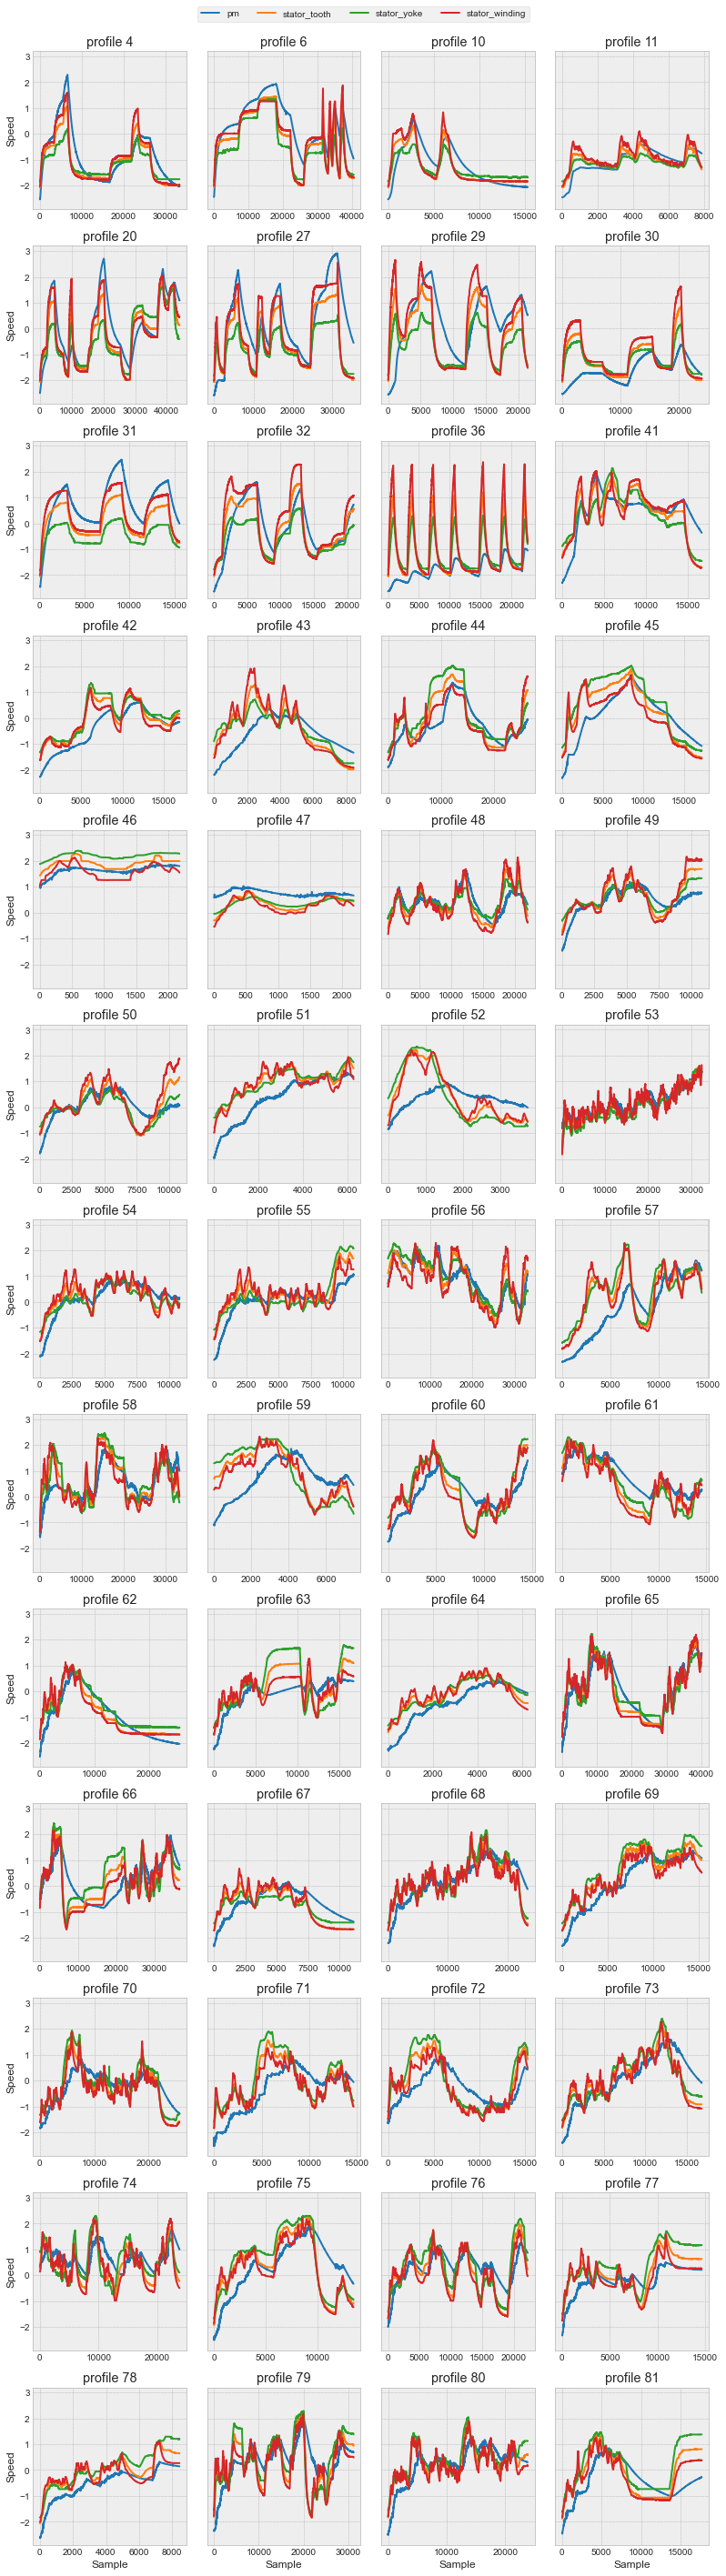

In [27]:
grpd = {pid: df_ for pid, df_ in df.groupby('profile_id')}
coi = target_features
n_cols = 4
n_rows = np.ceil(len(grpd) / n_cols).astype(int)
fig, axes = plt.subplots(n_rows, n_cols, sharey=True, figsize=(2.8*n_cols, n_rows*3))
for i, (ax, (p_id, df_)) in enumerate(zip(axes.flatten(), grpd.items())):
    for c in coi:
        lines = ax.plot(df_[c].reset_index(drop=True), label=c, color=feat_clrs[c])
    ax.set_title(f'profile {p_id}')
    if i % n_cols == 0:
        ax.set_ylabel('Speed')
    if i >= (len(grpd) - n_cols):
        ax.set_xlabel('Sample')
fig.tight_layout()
_ = ax.legend(ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

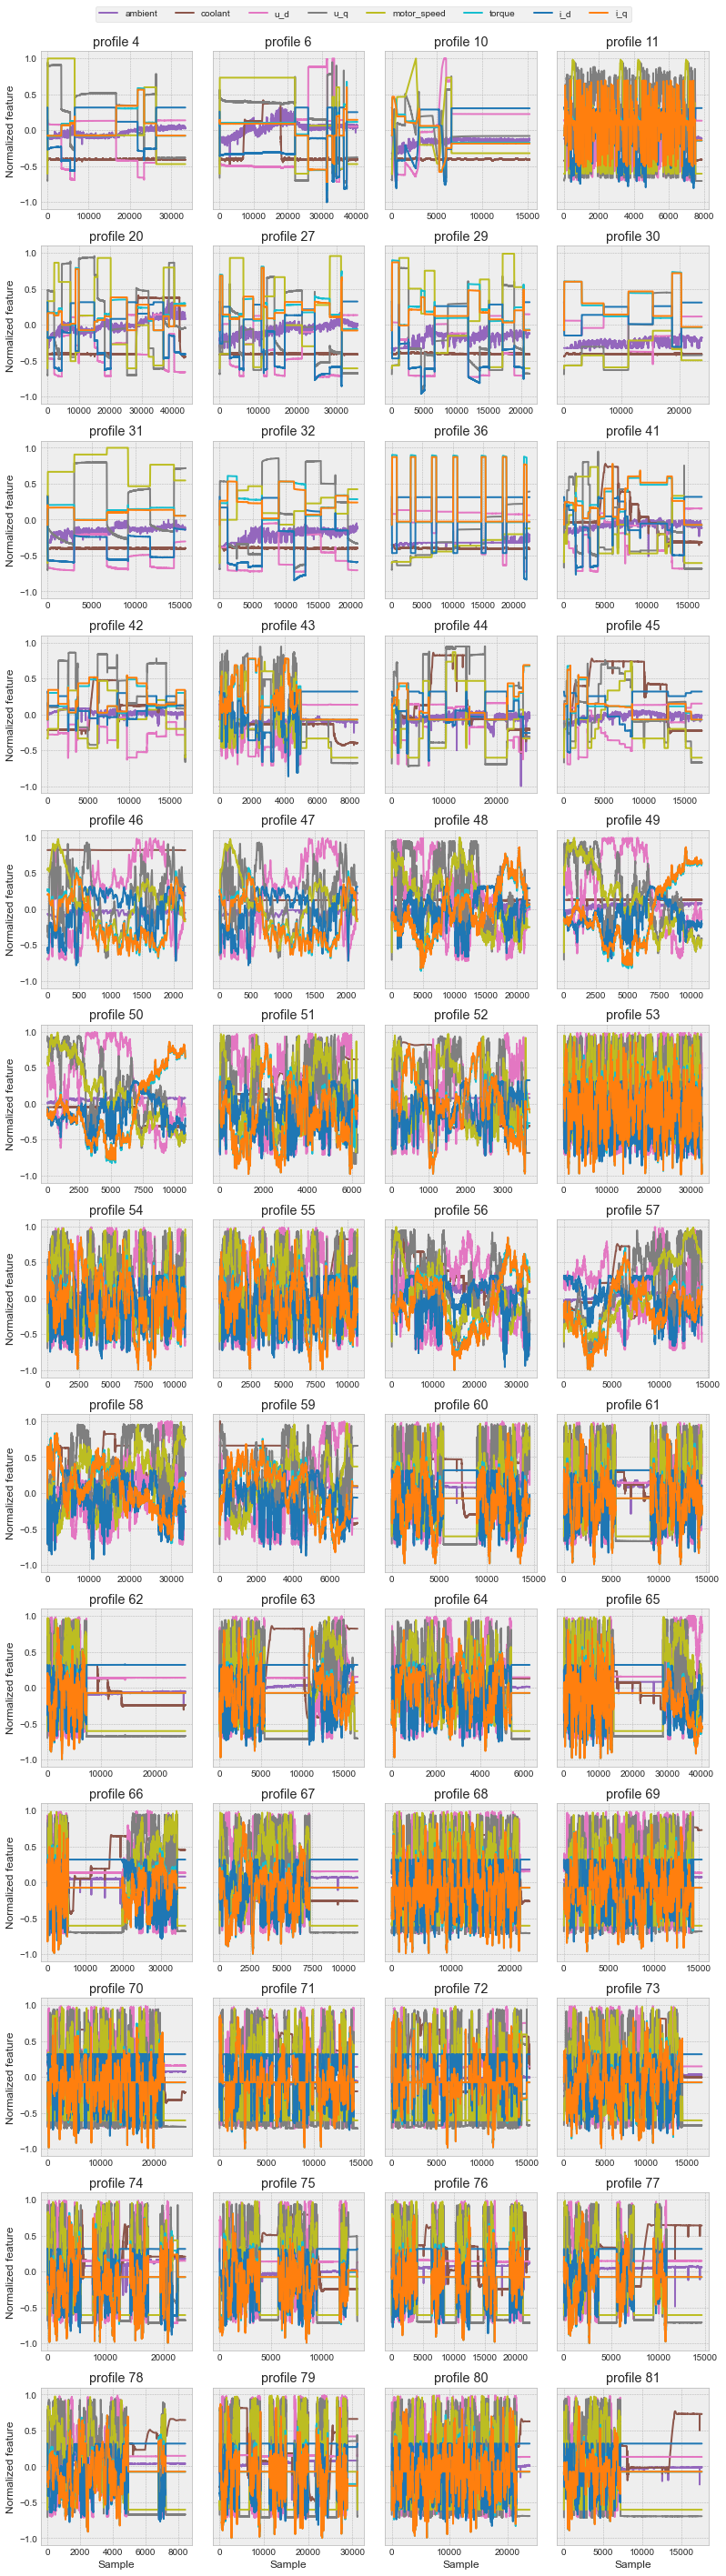

In [28]:
coi = [c for c in dfui if c not in target_features + ['profile_id']]
max_values_per_col = dfui.abs().max(axis=0)
fig, axes = plt.subplots(n_rows, n_cols, sharey=True, figsize=(2.8*n_cols, n_rows*3))
for i, (ax, (p_id, df_)) in enumerate(zip(axes.flatten(), grpd.items())):
    for c in coi:
        lines = ax.plot(df_[c].reset_index(drop=True)/max_values_per_col[c], label=c, color=feat_clrs[c])
    ax.set_title(f'profile {p_id}')
    if i % n_cols == 0:
        ax.set_ylabel('Normalized feature')
    if i >= (len(grpd) - n_cols):
        ax.set_xlabel('Sample')
fig.tight_layout()
_ = ax.legend(ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

We find:

While motor excitations (motor_speed, torque, coolant) are sometimes of high dynamic, sometimes of stepwise nature, target temperatures always exhibit low-pass behavior with exponential rise and falls.

Coolant temperature suffers from measurement artefacts expressed by sharp drops in temperature, which recover as fast.

PM (Permanent Magnet -> Rotor) temperature expresses the slowest time constant and follows stator temperatures.

Motor_speed and torque (the excitation features) follow sometimes step-wise cycles, sometimes random walks.

Some profiles denote resting phases, where all input features stay constant most of the time.

## operation points

#### The operation points of a motor is often explained by its location in the motor_speed-torque-plane.

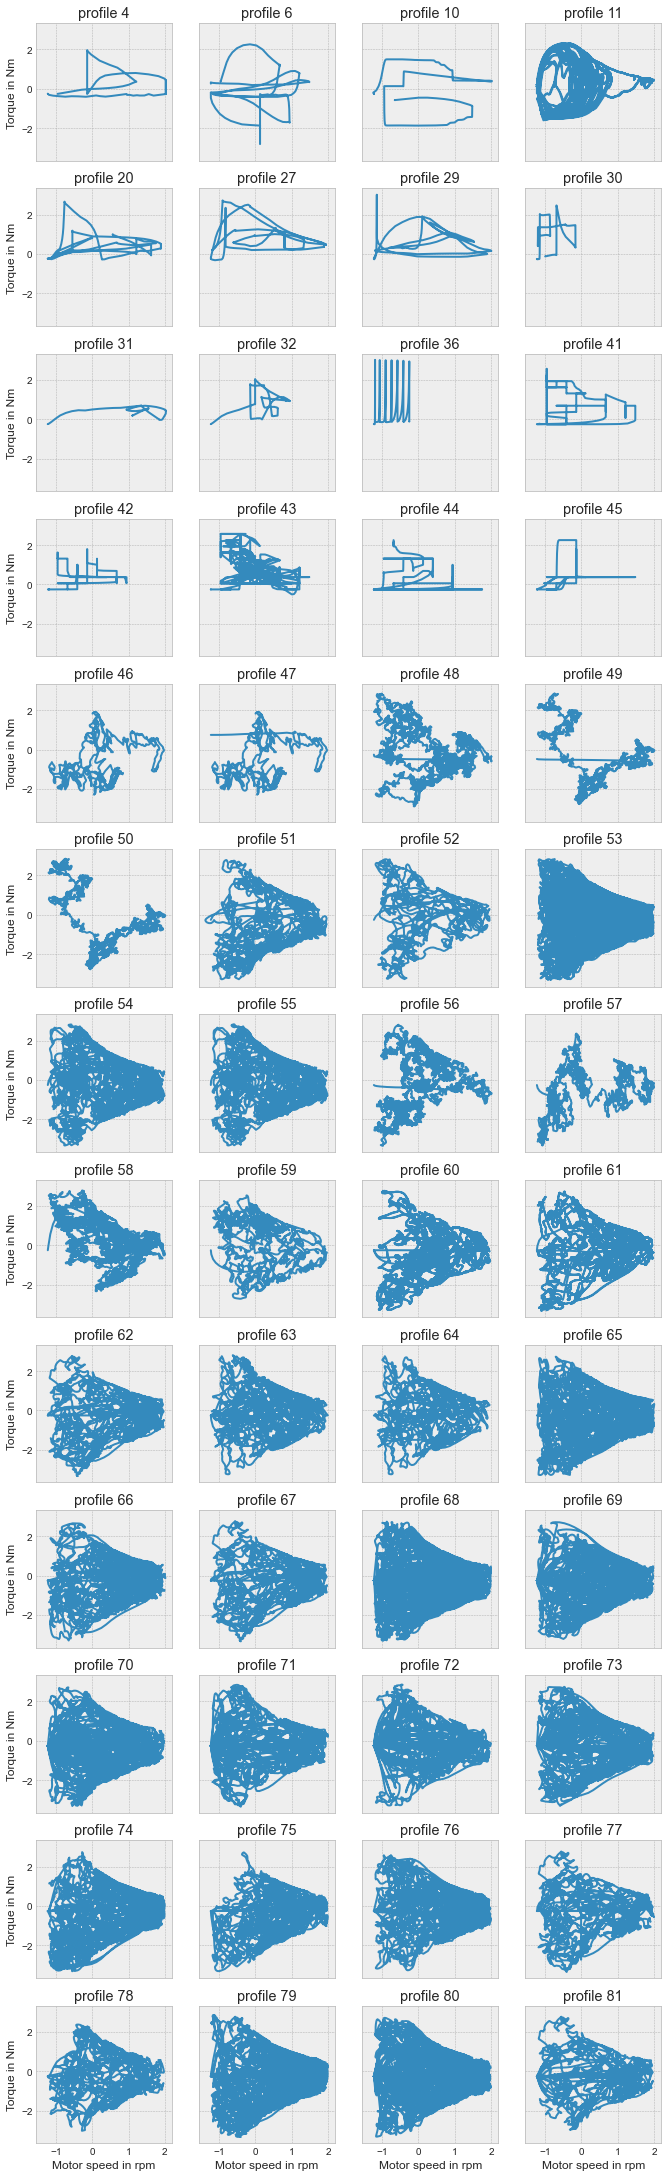

In [29]:
fig, axes = plt.subplots(n_rows, n_cols, sharey=True, sharex=True, figsize=(2.8*n_cols, n_rows*3))
for i, (ax, (p_id, df_)) in enumerate(zip(axes.flatten(), grpd.items())):
    ax.plot(df_.motor_speed, df_.torque)
    ax.set_title(f'profile {p_id}')
    if i % n_cols == 0:
        ax.set_ylabel('Torque in Nm')
    if i >= len(grpd)-n_cols:
        ax.set_xlabel('Motor speed in rpm')

We see that some driving cycles only capture little of the valid operation region, while other profiles do comprehensive random walks over the full operative range.

Note that motors are power rated, and since power is defined as P=motorspeed⋅torque, there are elliptical borders that can't be exceeded.

By the way, profile no. 11 denotes the repeated FTP-75.

Let's have a look at a heat map that shows which operation points where visited how often (brighter areas are visited more often).

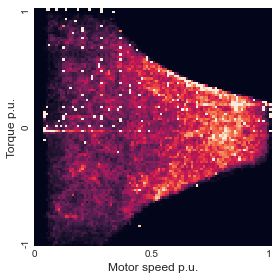

In [30]:
# heat map
N_BINS = 100
dfui = df.assign(binned_torque=pd.cut(df.torque.values.ravel(), bins=N_BINS, include_lowest=True),
                 binned_speed=pd.cut(df.motor_speed.values.ravel(), bins=N_BINS, include_lowest=True))

ts_map = dfui.loc[:, ['binned_torque', 'binned_speed', 'torque']]\
            .groupby(['binned_torque', 'binned_speed']).count().fillna(0).reset_index()\
            .rename(columns={'torque': 'count'})\
            .pivot(index='binned_torque', columns='binned_speed', values='count')\
            .sort_values('binned_torque', ascending=False)
plt.figure(figsize=(6, 4))
ax = sns.heatmap(ts_map, robust=True, square=True, yticklabels=49, xticklabels=49, cbar=False)
_ = ax.set_ylabel('Torque p.u.')
_ = ax.set_xlabel('Motor speed p.u.')
_ = ax.set_xticklabels([0, 0.5, 1], rotation=0)
_ = ax.set_yticklabels([1, 0, -1])
plt.tight_layout()

fig = plt.figure(figsize=(17, 3))
cols = 4
for i in range(cols):
    plt.subplot(1, cols, i+1)
    plt.scatter(transformed[:, i], [:, i+1], c=_df.motor_speed.values, cmap=plt.get_cmap('coolwarm'), marker='.', vmin=_df['motor_speed'].min(), vmax=_df['motor_speed'].max())
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

We find:

No gaussian distributions are recognizable,
nor is the target temperature distinguishable in the spatial dimension.
good features need to be found, different from the raw sensor data.

In [3]:
!pip install pywedge

     ---------------------------------------- 74.0/74.0 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 226.0/226.0 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [35]:
import pywedge as pw
import pandas as pd

In [36]:
df= pd.read_csv(r"C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Project/temperature_data.csv")
df.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [37]:
mc = pw.Pywedge_Charts(df, c=None, y ='motor_speed')

C:\Users\preet\anaconda3\lib\site-packages\pywedge\pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


In [38]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, classification_report
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [131]:
Electric_Motor = pd.read_csv(r"C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Project/temperature_data.csv")
Electric_Motor

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

In [132]:
Electric_Motor.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [4]:
Electric_Motor.tail()

ambient   coolant       u_d       u_q  motor_speed   torque  \
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.25564   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.25564   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.25564   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.25564   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.25564   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72

In [5]:
Electric_Motor.isna().sum() #Fiding num values

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [6]:
Electric_Motor.dtypes #Looking into type of dataset

ambient           float64
coolant           float64
u_d               float64
u_q               float64
motor_speed       float64
torque            float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
stator_tooth      float64
stator_winding    float64
profile_id          int64
dtype: object

In [7]:
Electric_Motor.nunique() #Checking with unique values

ambient           718720
coolant           829538
u_d               960969
u_q               931072
motor_speed       490798
torque            695029
i_d               661242
i_q               655589
pm                945166
stator_yoke       861836
stator_tooth      854787
stator_winding    899142
profile_id            52
dtype: int64

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
del Electric_Motor['profile_id']

In [135]:
Electric_Motor

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
998065        0.494725  
998066        0.494279  
998067        0.492666  
998068        0.490581  
998069        0.489382  

[998070 rows x 12 columns]

## Data Normalization

In [136]:
Scaler = StandardScaler()
Electric_Motor_1 = Scaler.fit_transform(Electric_Motor)
Electric_Motor_1

array([[-0.75341625, -1.12045388,  0.32384208, ..., -1.83011168,
        -2.06476719, -2.01744231],
       [-0.77266885, -1.11903183,  0.32557536, ..., -1.82965916,
        -2.06348257, -2.01704034],
       [-0.78437773, -1.11869335,  0.32868866, ..., -1.82909105,
        -2.06269656, -2.01675207],
       ...,
       [-0.03871069,  0.30196085,  0.32685895, ...,  1.0012465 ,
         0.83648055,  0.49742538],
       [-0.03577363,  0.29664037,  0.32690032, ...,  0.99750219,
         0.83304777,  0.49533692],
       [-0.04017317,  0.30719908,  0.32674256, ...,  0.98551992,
         0.83058818,  0.49413635]])

In [137]:
Electric_Motor_1_N = pd.DataFrame(Electric_Motor_1, columns=Electric_Motor.columns)
Electric_Motor_1_N

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.753416 -1.120454  0.323842 -1.289164    -1.214600 -0.247367   
1      -0.772669 -1.119032  0.325575 -1.288994    -1.214601 -0.246316   
2      -0.784378 -1.118693  0.328689 -1.293119    -1.214600 -0.246615   
3      -0.782408 -1.118776  0.329619 -1.293150    -1.214602 -0.245818   
4      -0.775467 -1.118787  0.331128 -1.294413    -1.214601 -0.245883   
...          ...       ...       ...       ...          ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541    -1.214600 -0.252836   
998066 -0.045245  0.314537  0.327616 -1.242071    -1.214609 -0.252836   
998067 -0.038711  0.301961  0.326859 -1.238277    -1.214602 -0.252836   
998068 -0.035774  0.296640  0.326900 -1.240924    -1.214604 -0.252836   
998069 -0.040173  0.307199  0.326743 -1.238017    -1.214603 -0.252836   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.024560 -0.243174 -2.528584    -1.830112     -2.064767   
1       1.024497 -0.243146 -2.528932    -1.829659     -2.063483   
2       1.024435 -0.243132 -2.529189    -1.829091     -2.062697   
3       1.027836 -0.244271 -2.528150    -1.829024     -2.061760   
4       1.026797 -0.243925 -2.528413    -1.829189     -2.061418   
...          ...       ...       ...          ...           ...   
998065  1.024130 -0.243036  0.436131     1.016892      0.838630   
998066  1.024135 -0.243049  0.436028     1.011746      0.836983   
998067  1.024178 -0.243015  0.435715     1.001246      0.836481   
998068  1.024134 -0.243041  0.435834     0.997502      0.833048   
998069  1.024128 -0.243036  0.435441     0.985520      0.830588   

        stator_winding  
0            -2.017442  
1            -2.017040  
2            -2.016752  
3            -2.017041  
4            -2.017555  
...                ...  
998065        0.499487  
998066        0.499041  
998067        0.497425  
998068        0.495337  
998069        0.494136  

[998070 rows x 12 columns]

In [138]:
Electric_Motor_1_N.mean()

ambient          -8.710848e-14
coolant           3.311537e-14
u_d              -5.435962e-15
u_q               2.790820e-16
motor_speed       3.734451e-15
torque           -5.697083e-13
i_d               2.613170e-15
i_q               9.983176e-16
pm               -1.469712e-15
stator_yoke      -1.524101e-14
stator_tooth      1.158428e-15
stator_winding   -6.861447e-15
dtype: float64

In [139]:
Electric_Motor_1_N.std()

ambient           1.000001
coolant           1.000001
u_d               1.000001
u_q               1.000001
motor_speed       1.000001
torque            1.000001
i_d               1.000001
i_q               1.000001
pm                1.000001
stator_yoke       1.000001
stator_tooth      1.000001
stator_winding    1.000001
dtype: float64

## Outliers Removing

In [140]:
#AMBIENT
q1=Electric_Motor_1_N.ambient.quantile(0.25)
q3=Electric_Motor_1_N.ambient.quantile(0.75)
iqr=q3-q1
iqr

1.294961788707449

In [141]:
ub=q3+1.5*iqr
ub

2.6378031349433604

In [142]:
lb=q1-1.5*iqr
lb

-2.5420440198864354

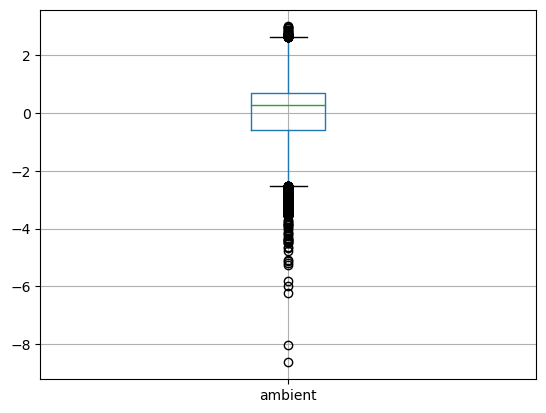

In [143]:
Electric_Motor_1_N.boxplot('ambient')
plt.show()

In [144]:
Electric_Motor_1_N[Electric_Motor_1_N['ambient']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
51062   2.650795  1.005438 -1.174750  0.711479     1.487534  0.346022   
51063   2.699631  1.005716 -1.173710  0.714405     1.487534  0.346082   
51064   2.733268  1.005996 -1.171983  0.714847     1.487538  0.346134   
51065   2.735216  1.006126 -1.171735  0.717010     1.487535  0.345567   
51066   2.699747  1.006011 -1.171567  0.716829     1.487535  0.345232   
...          ...       ...       ...       ...          ...       ...   
556660  2.664902  1.055786  0.277840  1.760307     1.184938 -0.281267   
556661  2.667971  1.055236  0.252855  1.759183     1.192975 -0.270834   
556662  2.663456  1.054635  0.213743  1.755326     1.203402 -0.254550   
556663  2.660222  1.054204  0.164284  1.748966     1.213600 -0.233167   
556664  2.647680  1.053661  0.102706  1.738062     1.221671 -0.207321   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
51062  -0.997947  0.316777  1.928760     1.325617      1.439464   
51063  -0.999580  0.316657  1.928711     1.326415      1.440625   
51064  -1.000141  0.316650  1.928405     1.326736      1.438779   
51065  -1.000367  0.316474  1.928316     1.326710      1.438527   
51066  -1.000597  0.316165  1.927297     1.326860      1.439037   
...          ...       ...       ...          ...           ...   
556660 -0.084226 -0.271873  1.313874     1.120977      0.994773   
556661 -0.091756 -0.261368  1.327868     1.120890      0.993770   
556662 -0.103742 -0.244955  1.327161     1.120827      0.994115   
556663 -0.117378 -0.223427  1.321976     1.120782      0.994231   
556664 -0.132424 -0.197445  1.317756     1.120749      0.995055   

        stator_winding  
51062         1.267642  
51063         1.267642  
51064         1.267642  
51065         1.267642  
51066         1.267642  
...                ...  
556660        0.664942  
556661        0.663610  
556662        0.662604  
556663        0.662796  
556664        0.662365  

[132 rows x 12 columns]

In [145]:
Electric_Motor_1_N[Electric_Motor_1_N['ambient']<lb]

ambient   coolant       u_d       u_q  motor_speed    torque  \
36414  -3.720567 -1.290263 -1.133511  0.750622     1.487536  0.354889   
36415  -2.906820 -1.235662 -1.135347  0.750927     1.487534  0.354191   
73810  -2.764957 -1.064265  0.328452 -1.268235    -1.214603 -0.240478   
73811  -2.764957 -1.065242  0.329107 -1.271106    -1.214599 -0.241162   
73812  -2.764957 -1.065381  0.327808 -1.267098    -1.214601 -0.240339   
...          ...       ...       ...       ...          ...       ...   
947783 -2.796042  0.049946  0.948997  0.126597    -0.404548 -1.048679   
989728 -4.428139 -0.995368  1.004167  1.241913     1.945881 -0.607063   
989729 -5.272207 -1.080932  0.777935  1.371489     1.941306 -0.509743   
989730 -3.817157 -0.927692  0.786821  1.439833     1.923238 -0.506907   
989731 -2.775141 -0.817685  0.900159  1.434456     1.896717 -0.550336   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
36414  -1.085933  0.308247  0.147172    -0.702684     -0.221975   
36415  -1.084064  0.308666  0.147012    -0.711721     -0.221862   
73810   1.024124 -0.243037 -2.530038    -1.819933     -2.057939   
73811   1.024144 -0.243030 -2.529675    -1.819486     -2.058006   
73812   1.024151 -0.243020 -2.529524    -1.818844     -2.058033   
...          ...       ...       ...          ...           ...   
947783  0.726339 -1.151530  0.225724     0.226001      0.030149   
989728 -0.945990 -0.570926  0.390356    -0.734554     -0.760052   
989729 -0.872145 -0.482795  0.382013    -0.734557     -0.760051   
989730 -0.823712 -0.482090  0.381878    -0.734559     -0.760050   
989731 -0.812851 -0.522354  0.381913    -0.734560     -0.760050   

        stator_winding  
36414         0.020136  
36415         0.020650  
73810        -2.003613  
73811        -2.003106  
73812        -2.002707  
...                ...  
947783       -0.117555  
989728       -0.720999  
989729       -0.717236  
989730       -0.713819  
989731       -0.711458  

[38360 rows x 12 columns]

In [146]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['ambient']>=2.6,'ambient']=2.6
Electric_Motor_1_N.loc[Electric_Motor_1_N['ambient']<=-2.5,'ambient']=-2.5

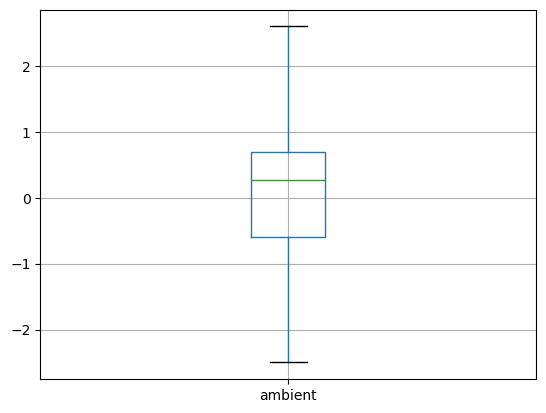

In [147]:
Electric_Motor_1_N.boxplot('ambient')
plt.show()

In [148]:
#U_d
q1=Electric_Motor_1_N.u_d.quantile(0.25)
q3=Electric_Motor_1_N.u_d.quantile(0.75)
iqr=q3-q1
iqr

1.1873696667892364

In [149]:
ub=q3+1.5*iqr
ub

2.1355173800786513

In [150]:
lb=q1-1.5*iqr
lb

-2.6139612870782942

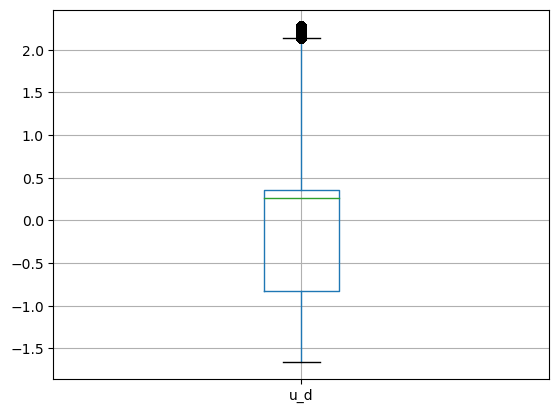

In [151]:
Electric_Motor_1_N.boxplot('u_d')
plt.show()

In [152]:
Electric_Motor_1_N[Electric_Motor_1_N['u_d']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
64736   0.637096 -1.095675  2.136151 -0.219395     0.136357 -2.164962   
64737   0.611040 -1.096160  2.170091 -0.374261     0.136384 -2.258827   
64738   0.589883 -1.096504  2.195442 -0.507100     0.136380 -2.331792   
64739   0.574097 -1.096820  2.213177 -0.808796     0.136348 -2.450413   
64740   0.558275 -1.096930  2.223030 -1.088536     0.136380 -2.553290   
...          ...       ...       ...       ...          ...       ...   
995572 -0.122304 -0.697781  2.157315 -0.255950     0.221501 -2.085793   
995573 -0.123062 -0.694680  2.148964 -0.209879     0.224204 -2.058034   
995580 -0.116055 -0.694505  2.142024 -0.159688     0.133783 -2.142095   
995581 -0.118585 -0.696690  2.147727 -0.178414     0.148443 -2.135755   
995582 -0.120863 -0.698439  2.145093 -0.165982     0.160635 -2.114014   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
64736  -1.048812 -2.034156 -0.164818    -0.734564     -0.376416   
64737  -1.260955 -2.092766 -0.164609    -0.734564     -0.378827   
64738  -1.441296 -2.138755 -0.164222    -0.734564     -0.376867   
64739  -1.855910 -2.205055 -0.164082    -0.734564     -0.373328   
64740  -2.239619 -2.258798 -0.163988    -0.734564     -0.374924   
...          ...       ...       ...          ...           ...   
995572 -1.201779 -1.964923 -0.852986    -0.934013     -0.890458   
995573 -1.143379 -1.945795 -0.861399    -0.930389     -0.888648   
995580 -0.980440 -2.056233 -0.858131    -0.917717     -0.878360   
995581 -1.021740 -2.043186 -0.862172    -0.917966     -0.875777   
995582 -1.019045 -2.021496 -0.853589    -0.916155     -0.873926   

        stator_winding  
64736        -0.130374  
64737        -0.133739  
64738        -0.138146  
64739        -0.140798  
64740        -0.141688  
...                ...  
995572       -0.772420  
995573       -0.774499  
995580       -0.743190  
995581       -0.737529  
995582       -0.733557  

[18050 rows x 12 columns]

In [153]:
Electric_Motor_1_N[Electric_Motor_1_N['u_d']<lb]

Empty DataFrame
Columns: [ambient, coolant, u_d, u_q, motor_speed, torque, i_d, i_q, pm, stator_yoke, stator_tooth, stator_winding]
Index: []

In [154]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['u_d']>=2.13,'u_d']=2.13
Electric_Motor_1_N.loc[Electric_Motor_1_N['u_d']<=-2.16,'u_d']=-2.16

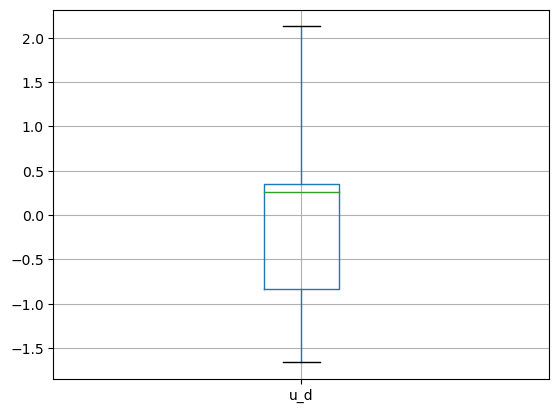

In [155]:
Electric_Motor_1_N.boxplot('u_d')
plt.show()

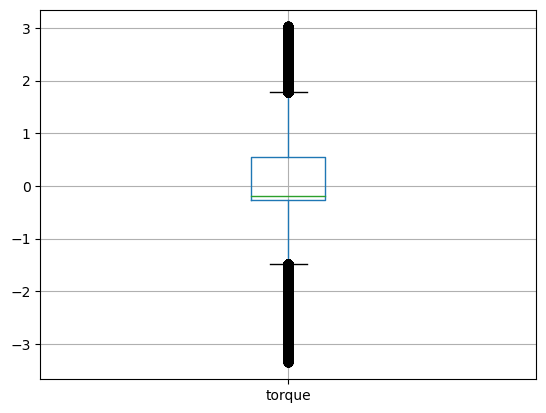

In [156]:
#Torque
q1=Electric_Motor_1_N.torque.quantile(0.25)
q3=Electric_Motor_1_N.torque.quantile(0.75)
iqr=q3-q1
iqr

ub=q3+1.5*iqr
ub

lb=q1-1.5*iqr
lb

Electric_Motor_1_N.boxplot('torque')
plt.show()

In [157]:
Electric_Motor_1_N[Electric_Motor_1_N['torque']>ub]

ambient   coolant       u_d       u_q  motor_speed    torque  \
21866   0.183363 -1.041328 -1.437720  0.148486    -0.133694  1.812493   
21867   0.193976 -1.041139 -1.455268  0.090175    -0.133707  1.858307   
21868   0.195721 -1.040945 -1.467465  0.047154    -0.133721  1.892124   
21869   0.188811 -1.040794 -1.476486  0.018601    -0.133728  1.915428   
21870   0.162362 -1.040322 -1.483169 -0.002439    -0.133732  1.932075   
...          ...       ...       ...       ...          ...       ...   
996944 -0.087042  1.459179 -1.549911 -0.300555    -0.093651  2.031137   
996945 -0.084506  1.458948 -1.502595 -0.141854    -0.096793  1.917241   
996946 -0.083711  1.458850 -1.419172  0.004484    -0.116942  1.781597   
996958 -0.069783  1.460209 -1.588949 -0.590703     0.096693  1.780724   
996959 -0.078785  1.461295 -1.585867 -0.536025     0.083637  1.788347   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
21866  -0.557368  1.811112 -0.995147    -1.048344     -0.954575   
21867  -0.661794  1.836681 -0.992734    -1.049174     -0.954163   
21868  -0.737139  1.854926 -0.992746    -1.048623     -0.953763   
21869  -0.789397  1.868387 -0.994923    -1.048050     -0.953149   
21870  -0.827515  1.877821 -0.996751    -1.047698     -0.952937   
...          ...       ...       ...          ...           ...   
996944 -1.327916  1.912858 -0.394063     0.946030      0.593253   
996945 -1.040988  1.849301 -0.395086     0.946450      0.591782   
996946 -0.735162  1.767996 -0.388505     0.947244      0.597615   
996958 -1.822049  1.591376 -0.401824     0.949551      0.637293   
996959 -1.746868  1.606916 -0.402180     0.949570      0.639490   

        stator_winding  
21866        -0.838167  
21867        -0.837693  
21868        -0.838092  
21869        -0.837349  
21870        -0.831350  
...                ...  
996944        0.395260  
996945        0.409534  
996946        0.414355  
996958        0.487713  
996959        0.485637  

[46838 rows x 12 columns]

In [158]:
Electric_Motor_1_N[Electric_Motor_1_N['torque']<lb]

ambient   coolant       u_d       u_q  motor_speed    torque  \
59375   0.500143 -1.071996  1.025175 -0.475731    -0.668617 -1.630980   
59376   0.495834 -1.071608  1.236930 -0.242405    -0.515157 -1.721943   
59377   0.502643 -1.071378  1.449738 -0.004595    -0.359114 -1.807770   
59378   0.507611 -1.070205  1.619396  0.128791    -0.218677 -1.830951   
59379   0.503368 -1.068505  1.725817  0.184473    -0.117988 -1.842743   
...          ...       ...       ...       ...          ...       ...   
996879 -0.096330  1.460508  1.898797  0.504374     0.077798 -1.751456   
996880 -0.096273  1.461006  1.932476  0.429726     0.082081 -1.803517   
996881 -0.091632  1.460760  1.964753  0.354526     0.101884 -1.839904   
996882 -0.095462  1.460751  1.991615  0.289865     0.132946 -1.856664   
996883 -0.094628  1.460678  1.808716  0.516497     0.158135 -1.629269   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
59375   0.400950 -1.594656 -1.175700    -1.751032     -1.984352   
59376   0.344072 -1.692022 -1.176475    -1.750092     -1.984352   
59377   0.301588 -1.762603 -1.176369    -1.749071     -1.984352   
59378   0.165773 -1.792591 -1.176077    -1.749104     -1.984352   
59379   0.012048 -1.802182 -1.176269    -1.749786     -1.984352   
...          ...       ...       ...          ...           ...   
996879  0.084205 -1.834083 -0.493536     0.886913      0.452196   
996880 -0.028732 -1.868690 -0.493793     0.888451      0.452478   
996881 -0.165898 -1.882416 -0.489440     0.889960      0.452525   
996882 -0.301038 -1.876331 -0.483354     0.889529      0.451954   
996883 -0.067862 -1.658707 -0.514005     0.888620      0.451419   

        stator_winding  
59375        -1.968839  
59376        -1.969496  
59377        -1.969708  
59378        -1.969238  
59379        -1.968987  
...                ...  
996879        0.076054  
996880        0.083044  
996881        0.088053  
996882        0.093076  
996883        0.099839  

[80465 rows x 12 columns]

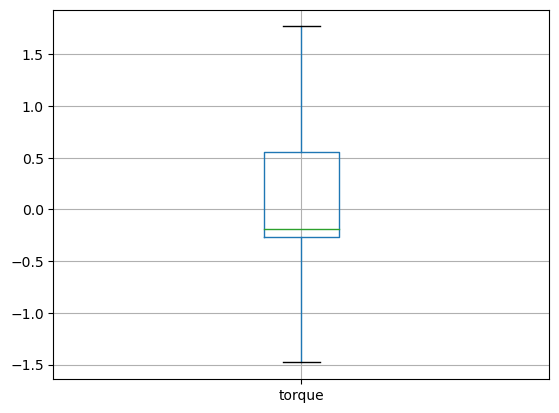

In [159]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['torque']>=1.77,'torque']=1.77
Electric_Motor_1_N.loc[Electric_Motor_1_N['torque']<=-1.48,'torque']=-1.48

Electric_Motor_1_N.boxplot('torque')
plt.show()

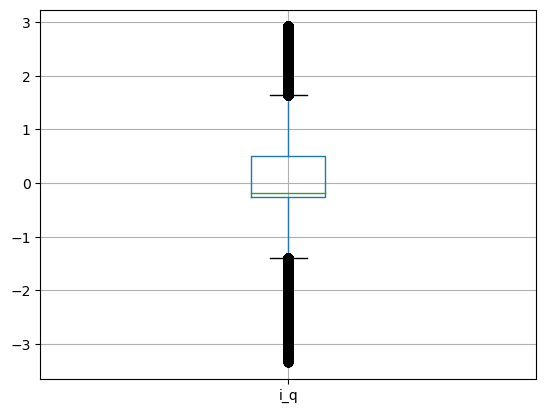

In [160]:
#i_q
q1=Electric_Motor_1_N.i_q.quantile(0.25)
q3=Electric_Motor_1_N.i_q.quantile(0.75)
iqr=q3-q1
iqr

ub=q3+1.5*iqr
ub

lb=q1-1.5*iqr
lb

Electric_Motor_1_N.boxplot('i_q')
plt.show()

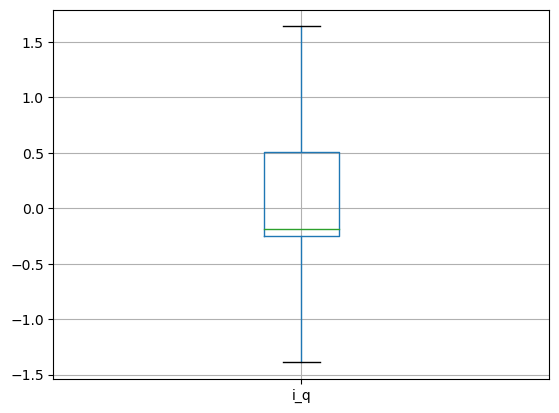

In [161]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['i_q']>=1.64,'i_q']=1.64
Electric_Motor_1_N.loc[Electric_Motor_1_N['i_q']<=-1.39,'i_q']=-1.39

Electric_Motor_1_N.boxplot('i_q')
plt.show()

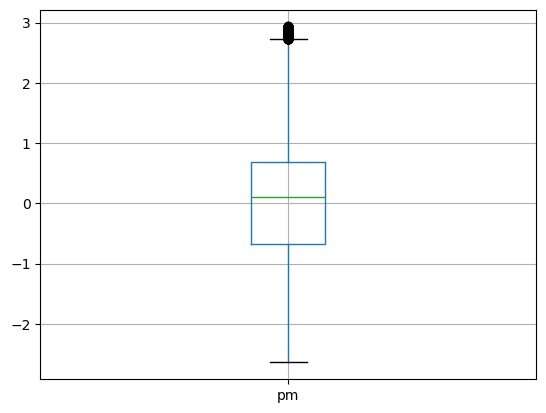

In [162]:
#pm

q1=Electric_Motor_1_N.pm.quantile(0.25)
q3=Electric_Motor_1_N.pm.quantile(0.75)
iqr=q3-q1
iqr

ub=q3+1.5*iqr
ub

lb=q1-1.5*iqr
lb

Electric_Motor_1_N.boxplot('pm')
plt.show()

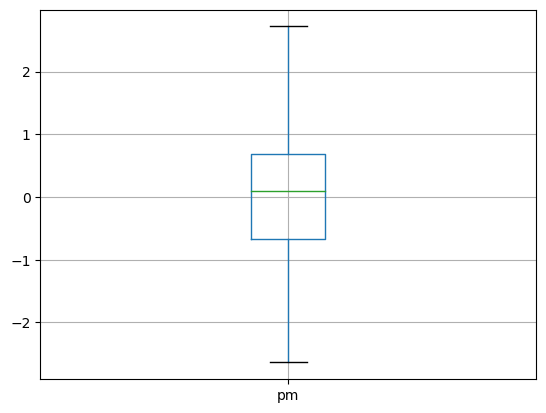

In [163]:
Electric_Motor_1_N.loc[Electric_Motor_1_N['pm']>=2.72,'pm']=2.72
Electric_Motor_1_N.loc[Electric_Motor_1_N['pm']<=-2.7,'pm']=-2.7

Electric_Motor_1_N.boxplot('pm')
plt.show()

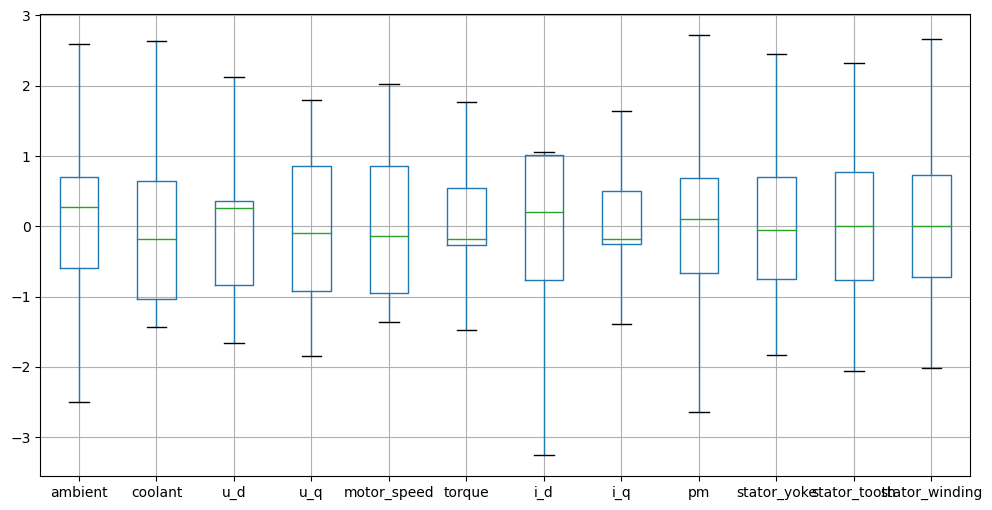

In [164]:
Electric_Motor_1_N.boxplot(figsize=(12,6))#No Outliers
plt.show()

In [165]:
Electric_Motor_1_N

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.753416 -1.120454  0.323842 -1.289164    -1.214600 -0.247367   
1      -0.772669 -1.119032  0.325575 -1.288994    -1.214601 -0.246316   
2      -0.784378 -1.118693  0.328689 -1.293119    -1.214600 -0.246615   
3      -0.782408 -1.118776  0.329619 -1.293150    -1.214602 -0.245818   
4      -0.775467 -1.118787  0.331128 -1.294413    -1.214601 -0.245883   
...          ...       ...       ...       ...          ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541    -1.214600 -0.252836   
998066 -0.045245  0.314537  0.327616 -1.242071    -1.214609 -0.252836   
998067 -0.038711  0.301961  0.326859 -1.238277    -1.214602 -0.252836   
998068 -0.035774  0.296640  0.326900 -1.240924    -1.214604 -0.252836   
998069 -0.040173  0.307199  0.326743 -1.238017    -1.214603 -0.252836   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.024560 -0.243174 -2.528584    -1.830112     -2.064767   
1       1.024497 -0.243146 -2.528932    -1.829659     -2.063483   
2       1.024435 -0.243132 -2.529189    -1.829091     -2.062697   
3       1.027836 -0.244271 -2.528150    -1.829024     -2.061760   
4       1.026797 -0.243925 -2.528413    -1.829189     -2.061418   
...          ...       ...       ...          ...           ...   
998065  1.024130 -0.243036  0.436131     1.016892      0.838630   
998066  1.024135 -0.243049  0.436028     1.011746      0.836983   
998067  1.024178 -0.243015  0.435715     1.001246      0.836481   
998068  1.024134 -0.243041  0.435834     0.997502      0.833048   
998069  1.024128 -0.243036  0.435441     0.985520      0.830588   

        stator_winding  
0            -2.017442  
1            -2.017040  
2            -2.016752  
3            -2.017041  
4            -2.017555  
...                ...  
998065        0.499487  
998066        0.499041  
998067        0.497425  
998068        0.495337  
998069        0.494136  

[998070 rows x 12 columns]

# FEATURE SELECTION

In [79]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(Electric_Motor_1_N.drop('motor_speed',axis=1),Electric_Motor_1_N['motor_speed'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(Electric_Motor_1_N.drop('motor_speed',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

KeyboardInterrupt: 

In [175]:
Feature_Columns = {'stator_tooth', 'stator_winding', 'stator_yoke','ambient', 'coolant', 'i_d', 'motor_speed', 
                   'u_q', 'i_q', 'torque', 'u_d'}

In [176]:
X = Electric_Motor_1_N[Feature_Columns]

In [177]:
X

u_d   coolant  stator_yoke  stator_winding  stator_tooth  \
0       0.323842 -1.120454    -1.830112       -2.017442     -2.064767   
1       0.325575 -1.119032    -1.829659       -2.017040     -2.063483   
2       0.328689 -1.118693    -1.829091       -2.016752     -2.062697   
3       0.329619 -1.118776    -1.829024       -2.017041     -2.061760   
4       0.331128 -1.118787    -1.829189       -2.017555     -2.061418   
...          ...       ...          ...             ...           ...   
998065  0.327389  0.336101     1.016892        0.499487      0.838630   
998066  0.327616  0.314537     1.011746        0.499041      0.836983   
998067  0.326859  0.301961     1.001246        0.497425      0.836481   
998068  0.326900  0.296640     0.997502        0.495337      0.833048   
998069  0.326743  0.307199     0.985520        0.494136      0.830588   

             i_d       i_q    torque   ambient  motor_speed       u_q  
0       1.024560 -0.243174 -0.247367 -0.753416    -1.214600 -1.289164  
1       1.024497 -0.243146 -0.246316 -0.772669    -1.214601 -1.288994  
2       1.024435 -0.243132 -0.246615 -0.784378    -1.214600 -1.293119  
3       1.027836 -0.244271 -0.245818 -0.782408    -1.214602 -1.293150  
4       1.026797 -0.243925 -0.245883 -0.775467    -1.214601 -1.294413  
...          ...       ...       ...       ...          ...       ...  
998065  1.024130 -0.243036 -0.252836 -0.043894    -1.214600 -1.237541  
998066  1.024135 -0.243049 -0.252836 -0.045245    -1.214609 -1.242071  
998067  1.024178 -0.243015 -0.252836 -0.038711    -1.214602 -1.238277  
998068  1.024134 -0.243041 -0.252836 -0.035774    -1.214604 -1.240924  
998069  1.024128 -0.243036 -0.252836 -0.040173    -1.214603 -1.238017  

[998070 rows x 11 columns]

In [170]:
Y = Electric_Motor_1_N[[ 'motor_speed']]

In [171]:
Y

motor_speed
0         -1.214600
1         -1.214601
2         -1.214600
3         -1.214602
4         -1.214601
...             ...
998065    -1.214600
998066    -1.214609
998067    -1.214602
998068    -1.214604
998069    -1.214603

[998070 rows x 1 columns]

### Train test split

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=12)

# MODEL BUILDING

### 1.Linear Regression

In [45]:
l_reg = LinearRegression()
l_reg.fit(X_train,Y_train)

l_train_acc = (l_reg.score(X_train,Y_train))*100
l_test_acc = (l_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {l_train_acc}")
print(f"Test accuracy: {l_test_acc}")

Train accuracy: 93.80371915468079
Test accuracy: 93.82095235545202


In [46]:
Y_pred = l_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614, 1)


In [47]:
r2_l = r2_score(Y_test, Y_pred)*100
rms_l = sqrt(mean_squared_error(Y_test, Y_pred))
mae_l = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_l} %")
print(f"RMSE {rms_l}")
print(f"MAE {mae_l}")

R^2 score  93.82095235545202 %
RMSE 0.2482783946064904
MAE 0.18361579645888065


In [48]:
calculation = pd.DataFrame(np.c_[Y_test,l_reg.predict(X_test)], columns = ["Original speed","Predicted speed"])
calculation.head(5)

Original speed  Predicted speed
0        0.812004         1.037613
1       -1.214600        -1.326067
2       -0.539066        -0.468331
3       -0.155359        -0.043098
4       -0.639046        -0.599654

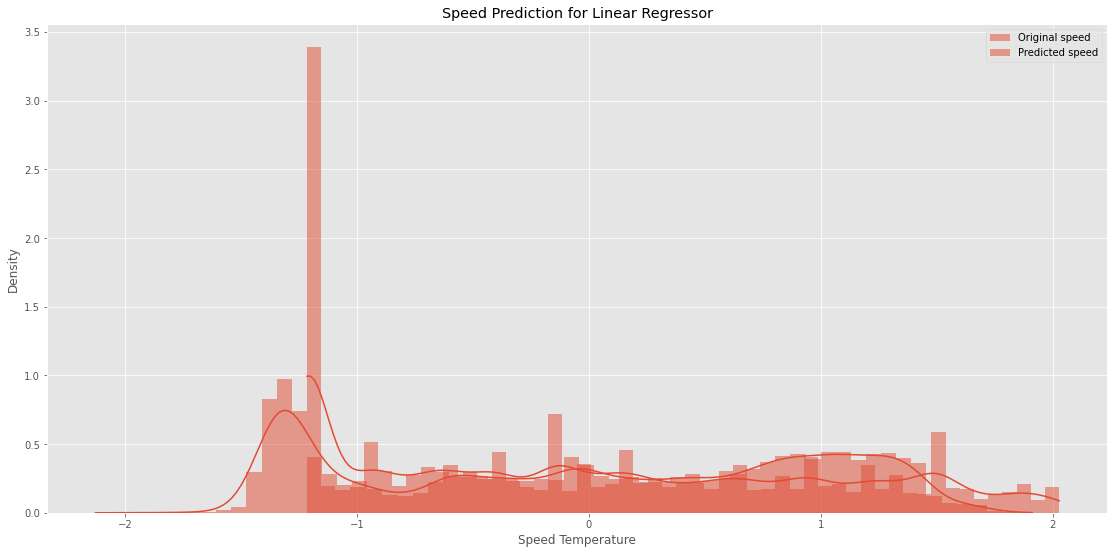

In [49]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original speed')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted speed')
plt.legend(loc = 'upper right') 
plt.title("Speed Prediction for Linear Regressor") 
plt.xlabel("Speed Temperature")
plt.ylabel("Density")
plt.show()

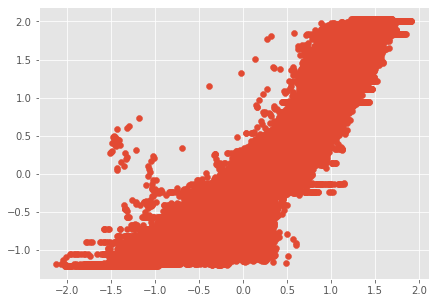

In [50]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

### 2.KNN Regressor

In [51]:
k_reg = KNeighborsRegressor(n_neighbors=10,p=2,metric='minkowski')
k_reg.fit(X_train,Y_train)

k_train_acc = (k_reg.score(X_train,Y_train))*100
k_test_acc = (k_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")

Train accuracy: 99.89290843712539
Test accuracy: 99.86173839785528


In [52]:
Y_pred = k_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614, 1)


In [53]:
r2_k = r2_score(Y_test, Y_pred)*100
rms_k = sqrt(mean_squared_error(Y_test, Y_pred))
mae_k = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_k} %")
print(f"RMSE {rms_k}")
print(f"MAE {mae_k}")

R^2 score  99.86173839785528 %
RMSE 0.03713889253306375
MAE 0.015821657990434366


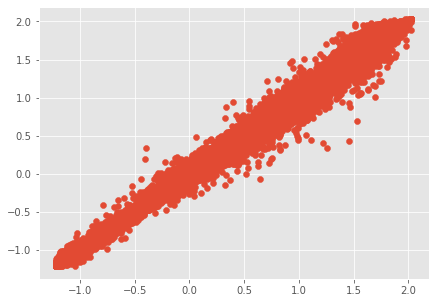

In [54]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

### 3.XG Boosting Regressor

In [39]:
from xgboost import XGBRegressor

In [40]:
x_reg = XGBRegressor()
x_reg.fit(X_train,Y_train)

x_train_acc = (x_reg.score(X_train,Y_train))*100
x_test_acc = (x_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {x_train_acc}")
print(f"Test accuracy: {x_test_acc}")

Train accuracy: 99.9537540191897
Test accuracy: 99.94652088542985


In [50]:
Y_pred = x_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [51]:
r2_x = r2_score(Y_test, Y_pred)*100
rms_x = sqrt(mean_squared_error(Y_test, Y_pred))
mae_x = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_x}")
print(f"RMSE is {rms_x}")
print(f"MAE {mae_x}")

R^2 score  99.94654050712572
RMSE is 0.023093543351889106
MAE 0.011488206617706777


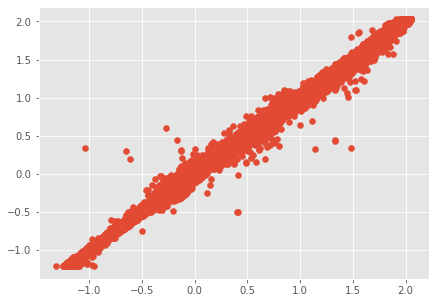

In [59]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

### 4.AdaBoosting Regressor

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [61]:
ab_reg = AdaBoostRegressor()
ab_reg.fit(X_train,Y_train)

ab_train_acc = (ab_reg.score(X_train,Y_train))*100
ab_test_acc = (ab_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {ab_train_acc}")
print(f"Test accuracy: {ab_test_acc}")

Train accuracy: 93.0717563297492
Test accuracy: 93.0695646944247


In [62]:
Y_pred = ab_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [63]:
r2_ab = r2_score(Y_test, Y_pred)*100
rms_ab = sqrt(mean_squared_error(Y_test, Y_pred))
mae_ab = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score  {r2_ab} %")
print(f"RMSE is {rms_ab}")
print(f"MAE {mae_ab}")

R^2 score  93.0695646944247 %
RMSE is 0.26294106247785953
MAE 0.22712507891517073


### 5.Random Forest Regressor

In [47]:
r_reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)
r_reg.fit(X_train,Y_train)

r_train_acc = (r_reg.score(X_train,Y_train))*100
r_test_acc = (r_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {r_train_acc}")
# printf("Train accuracy is %f", r_train_acc)
print(f"Test accuracy: {r_test_acc}")


KeyboardInterrupt: 

In [74]:
Y_pred = r_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [75]:
r2_r = r2_score(Y_test, Y_pred)*100
rms_r = sqrt(mean_squared_error(Y_test, Y_pred))
mae_r = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score {r2_r} %")
print(f"RMSE {rms_r}")
print(f"MAE {mae_r}")

R^2 score 99.97970084543459 %
RMSE 0.014230400787389031
MAE 0.004461021219630958


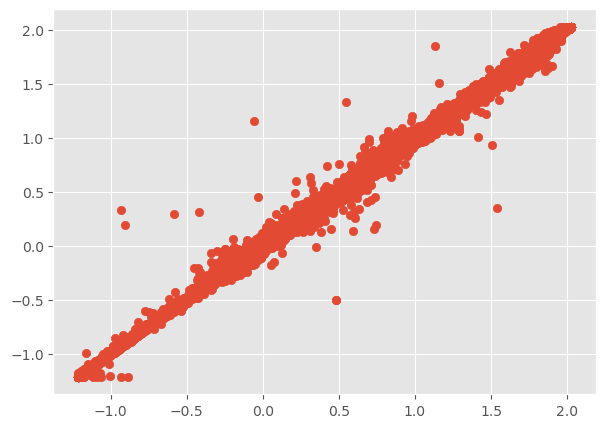

In [76]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

### 6.Decision Tree

In [77]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train,Y_train)

d_train_acc = (d_tree.score(X_train,Y_train))*100
d_test_acc = (d_tree.score(X_test,Y_test))*100

print(f"Train accuracy: {d_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {d_test_acc}")

Train accuracy: 99.99999999953843
Test accuracy: 99.95811728904988


In [78]:
Y_pred = d_tree.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(199614, 1) (199614,)


In [79]:
r2_d = r2_score(Y_test, Y_pred)*100
rms_d = sqrt(mean_squared_error(Y_test, Y_pred))
mae_d = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 Score   {r2_d}")
print(f"RMSE        {rms_d}")
print(f"MAE         {mae_d}")

R^2 Score   99.95811728904988
RMSE        0.020440689859492742
MAE         0.007157674897428934


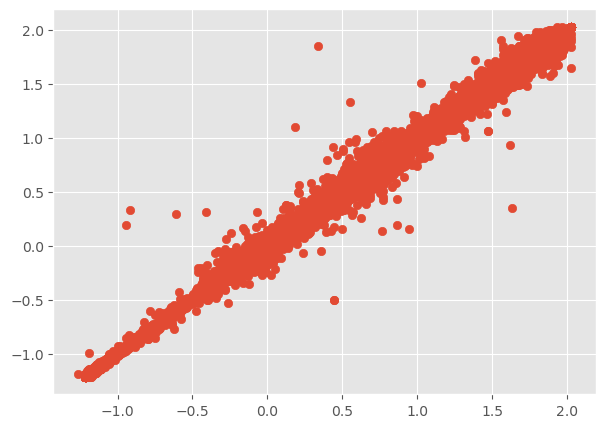

In [80]:
plt.figure(figsize=(7,5))
plt.scatter(Y_pred, Y_test)
plt.show()

In [81]:
models = pd.DataFrame({
    'Algorithm': ['Linear', 'KNN', 'XGBoosting', 'AdaBoosting',
                  'Random Forest', 'Decision tree'],
    'Training Accuracy' : [l_train_acc, k_train_acc, x_train_acc, ab_train_acc, r_train_acc, d_train_acc ],
    'Testing Accuracy' : [l_test_acc, k_test_acc, x_test_acc, ab_test_acc, r_test_acc, d_test_acc],
    'RMSE Score' : [rms_l, rms_k,rms_x, rms_ab, rms_r, rms_d],
    'MAE Score' : [mae_l,mae_k, mae_x, mae_ab, mae_r, mae_d],
    'R^2 Score': [ r2_l, r2_k,r2_x, r2_ab, r2_r, r2_d],
    #'CV R^2 Score': [r2_l_cv, r2_d_cv, r2_k_cv]
})

models.sort_values(by = ['Training Accuracy', 'Testing Accuracy', 'RMSE Score', 'MAE Score', 'R^2 Score'], 
                   ascending = True)

Algorithm  Training Accuracy  Testing Accuracy  RMSE Score  MAE Score  \
3    AdaBoosting          92.763173         92.781333    0.268353   0.229810   
0         Linear          93.588473         93.603963    0.252600   0.187182   
1            KNN          99.904530         99.878839    0.034766   0.014783   
2     XGBoosting          99.951052         99.943467    0.023748   0.011913   
4  Random Forest          99.997117         99.979701    0.014230   0.004461   
5  Decision tree         100.000000         99.958117    0.020441   0.007158   

   R^2 Score  
3  92.781333  
0  93.603963  
1  99.878839  
2  99.943467  
4  99.979701  
5  99.958117

## Algorithm Vs Training Accuracy

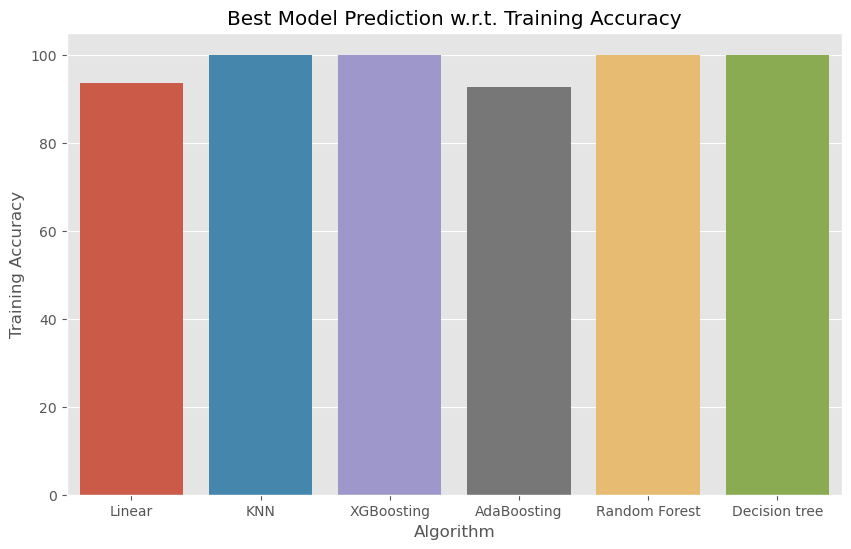

In [82]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Training Accuracy',data=models)
plt.title("Best Model Prediction w.r.t. Training Accuracy")
plt.show()

## Algorithm Vs Testing Accuracy

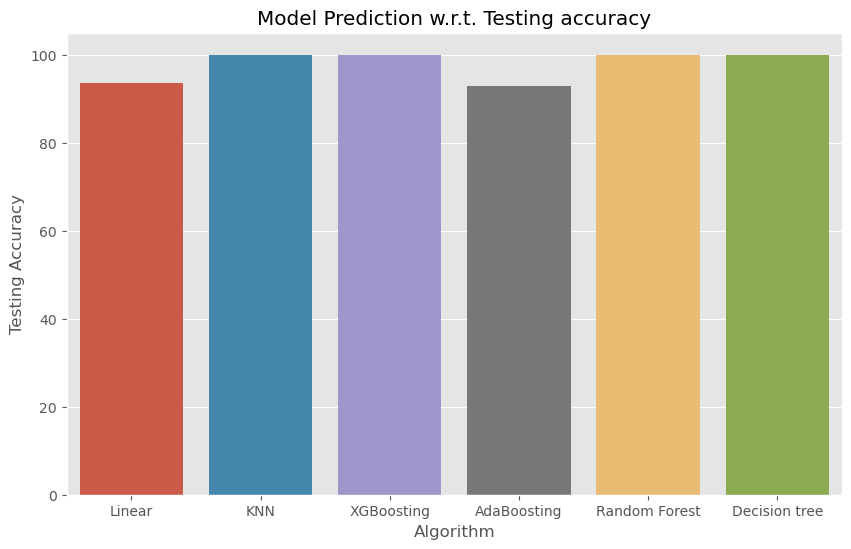

In [83]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='Testing Accuracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()


## Algorithm Vs R^2 Score

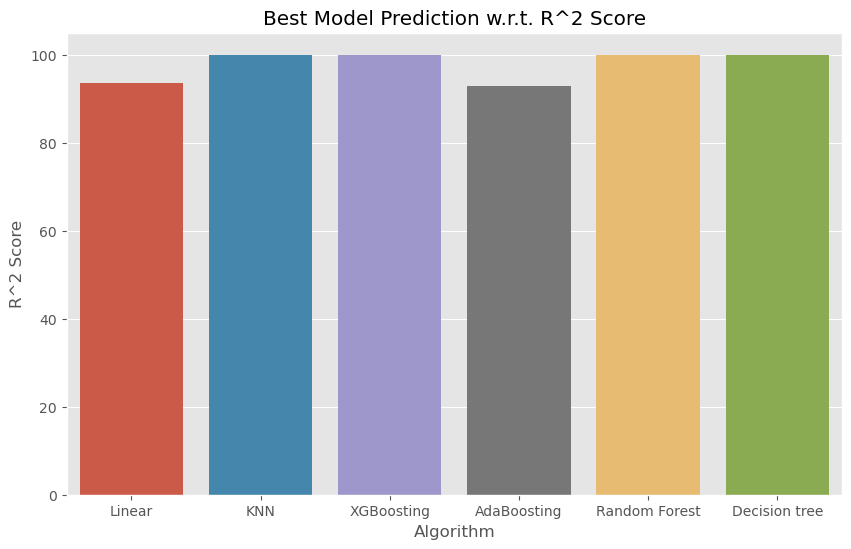

In [84]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

## MODEL DEPLOYMENT

### From all the models random forest regressor is the best model as it has best train and test accuracy

### Model saving 

In [41]:
from pickle import dump 
from pickle import load

In [42]:
#save the model to disk 
filename = 'finalized_model.sav'
dump(x_reg, open('filename', 'wb'))

In [43]:
#load the model from disk
loaded_model = load(open("filename", "rb"))

result = loaded_model.score(X_test, Y_test) #Using the model for test data
print(result)

0.9994652088542985
